<a href="https://colab.research.google.com/github/TomokazuHonda/data-analysis-basic-kadai/blob/main/9%E7%AB%A0%E3%83%87%E3%83%BC%E3%82%BF%E5%89%8D%E5%87%A6%E7%90%86%E6%BC%94%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import seaborn as sns
import numpy as np

# csvファイルをデータフレームとして読み込む
df = pd.read_csv("chapter9_exercise.csv")
# 先頭から5行目までを表示する
df.head()

,ID,名前,年齢,給与,入社日,勤務地,部門,退職
0,1,tanaka tarou,45,682690,2010-01-31,tokyo,営業,NaN
1,2,sato jiro,24,616880,2010-02-28,tokyo,営業,NaN
2,3,佐藤 次郎,26,791460,2010-03-31,大阪,NaN,いいえ
3,4,sato jiro,25,293264,2010-04-30,名古屋,マーケティング,Yes
4,5,sato jiro,29,425281,2010-05-31,東京,開発,いいえ


In [73]:
#matplotlibやseabornで図を表示する際の文字化け回避
#Jupyter・Colabの場合、「pip install」のようなコマンドは「!」必須
!pip install japanize-matplotlib
import japanize_matplotlib

In [74]:
#データの行数・列数を確認
df.shape

(100, 8)

In [75]:
#欠損データの有無を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      100 non-null    int64 
 1   名前      100 non-null    object
 2   年齢      100 non-null    int64 
 3   給与      100 non-null    int64 
 4   入社日     100 non-null    object
 5   勤務地     100 non-null    object
 6   部門      90 non-null     object
 7   退職      83 non-null     object
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [76]:
# 欠損値を「不明」に置き換える
df = df.fillna('不明')
# 先頭から5行目までを表示する
df.head()

,ID,名前,年齢,給与,入社日,勤務地,部門,退職
0,1,tanaka tarou,45,682690,2010-01-31,tokyo,営業,不明
1,2,sato jiro,24,616880,2010-02-28,tokyo,営業,不明
2,3,佐藤 次郎,26,791460,2010-03-31,大阪,不明,いいえ
3,4,sato jiro,25,293264,2010-04-30,名古屋,マーケティング,Yes
4,5,sato jiro,29,425281,2010-05-31,東京,開発,いいえ


<Axes: xlabel='給与'>

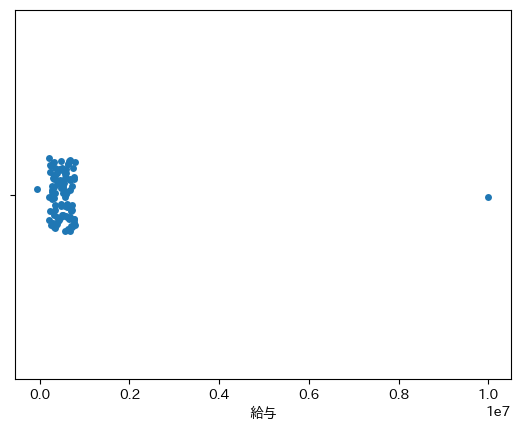

In [77]:
#散布図
sns.stripplot(x='給与', data=df)

In [78]:
# np.where(条件, True, False)
df['給与'] = np.where(df['給与'] > 1000000, 800000, df['給与'])
df['給与'] = np.where(df['給与'] < 0, 200000, df['給与'])

<Axes: xlabel='給与'>

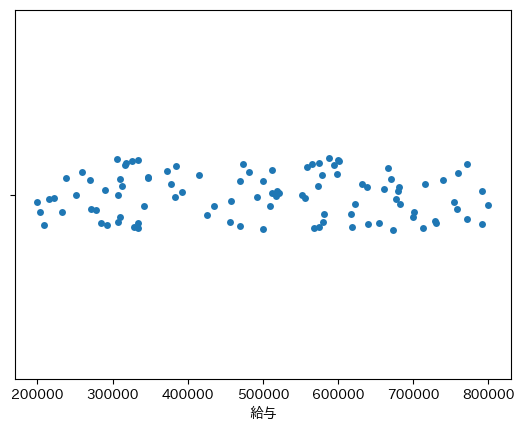

In [79]:
#散布図
sns.stripplot(x='給与', data=df)

In [80]:
# np.where(条件, True, False)
df['名前'] = np.where(df['名前'] == 'tanaka tarou', '田中 太郎', df['名前'])
df['名前'] = np.where(df['名前'] == 'sato jiro', '佐藤 次郎', df['名前'])

df['勤務地'] = np.where(df['勤務地'] == 'tokyo', '東京', df['勤務地'])
df['勤務地'] = np.where(df['勤務地'] == 'osaka', '大阪', df['勤務地'])

df['退職'] = np.where(df['退職'] == 'Yes', 'はい', df['退職'])
df['退職'] = np.where(df['退職'] == 'No', 'いいえ', df['退職'])

df

,ID,名前,年齢,給与,入社日,勤務地,部門,退職
0,1,田中 太郎,45,682690,2010-01-31,東京,営業,不明
1,2,佐藤 次郎,24,616880,2010-02-28,東京,営業,不明
2,3,佐藤 次郎,26,791460,2010-03-31,大阪,不明,いいえ
3,4,佐藤 次郎,25,293264,2010-04-30,名古屋,マーケティング,はい
4,5,佐藤 次郎,29,425281,2010-05-31,東京,開発,いいえ
...,...,...,...,...,...,...,...,...
95,96,佐藤 次郎,66,599111,2017-12-31,東京,営業,不明
96,97,佐藤 次郎,66,800000,2018-01-31,東京,営業,いいえ
97,98,山田 花子,69,200000,2018-02-28,東京,不明,不明
98,99,山田 花子,29,700000,2018-03-31,大阪,営業,いいえ


In [81]:
df.to_csv('chapter9_exercise_revised.csv')